In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

/Users/mengyu/env/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

# 通过整体分析得知异常值 TOTAL
data_dict.pop("TOTAL")

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [10]:
def get_data(features_list):
    data = featureFormat(data_dict, features_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    return labels, features

In [5]:
def draw(features, names=None, draw_index=(0, 1)):
    for feature in features:
        plt.scatter(feature[draw_index[0]], features[draw_index[1]], color = "b")
    if names:
        plt.xlabel(names[0])
        plt.ylabel(names[1])

In [118]:
# 财务特征
finance_features = ['salary', 
                    'deferral_payments', 
                    'total_payments', 
                    'loan_advances', 
                    'bonus', 
                    'restricted_stock_deferred', 
                    'deferred_income', 
                    'total_stock_value', 
                    'expenses', 
                    'exercised_stock_options', 
                    'other', 
                    'long_term_incentive', 
                    'restricted_stock', 
                    'director_fees'] 
email_features = ['to_messages', 
#                    'email_address', 
                   'from_poi_to_this_person', 
                   'from_messages', 
                   'from_this_person_to_poi', 
                   'shared_receipt_with_poi']

In [7]:
def draw_feature(names):
    if not isinstance(names, list):
        names = [names]
    features_list = ['poi'] + names
    print(features_list)
    labels, features = get_data(features_list)
    for feature, label in zip(features, labels):
        color = "r" if label else "b"
        if len(feature) == 1:
            plt.scatter(feature[0], 1, color=color)
        else:
            plt.scatter(feature[0], feature[1], color=color)
    if(len(names)>1):
        plt.ylabel(names[1])
    plt.xlabel(names[0])



['poi', 'from_this_person_to_poi', 'from_poi_to_this_person']


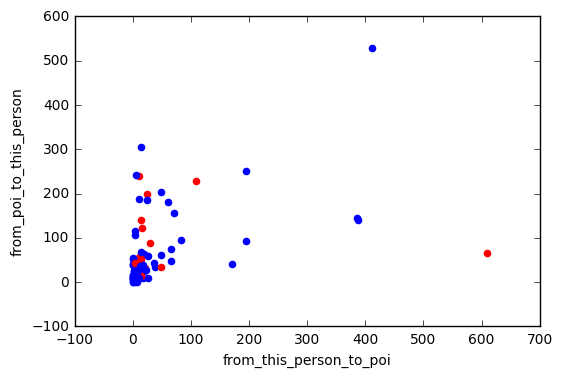

In [174]:
draw_feature(["from_this_person_to_poi", "from_poi_to_this_person"])

['poi', 'deferral_payments', 'total_payments']


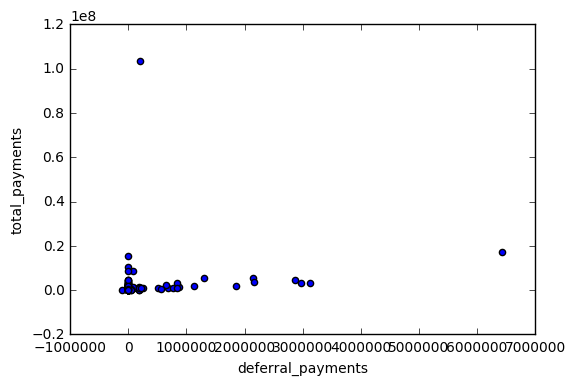

In [113]:
# draw_feature(["salary", "deferral_payments"])
draw_feature(["deferral_payments", "total_payments"])

In [161]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif)


In [162]:
all_features = ['poi'] + finance_features + email_features
labels, features = get_data(all_features)

In [163]:
selector.fit(features, labels)

SelectKBest(k=10, score_func=<function f_classif at 0x10e572f50>)

In [165]:
sorted(selector.scores_)

[0.06498431172371151,
 0.16416449823428736,
 0.2170589303395084,
 1.6988243485808501,
 2.1076559432760908,
 2.4265081272428781,
 4.204970858301416,
 5.3449415231473374,
 6.2342011405067401,
 7.2427303965360181,
 8.7464855321290802,
 8.8667215371077717,
 9.3467007910514877,
 10.072454529369441,
 11.595547659730601,
 18.575703268041785,
 21.060001707536571,
 24.467654047526398,
 25.097541528735491]

In [140]:
selector.fit_transform(features, labels)

array([[  2.01955000e+05,   4.17500000e+06,   1.72954100e+06,
          1.72954100e+06],
       [  0.00000000e+00,   0.00000000e+00,   2.57817000e+05,
          2.57817000e+05],
       [  4.77000000e+02,   0.00000000e+00,   5.24348700e+06,
          4.04615700e+06],
       [  2.67102000e+05,   1.20000000e+06,   1.06232580e+07,
          6.68054400e+06],
       [  2.39671000e+05,   4.00000000e+05,   6.30140000e+04,
          0.00000000e+00],
       [  8.08180000e+04,   0.00000000e+00,   1.59964100e+06,
          1.59964100e+06],
       [  2.31330000e+05,   7.00000000e+05,   1.26027000e+05,
          0.00000000e+00],
       [  2.13999000e+05,   5.24999900e+06,   1.11070500e+06,
          9.53136000e+05],
       [  0.00000000e+00,   0.00000000e+00,  -4.40930000e+04,
          3.28500000e+03],
       [  2.16582000e+05,   0.00000000e+00,   2.49361600e+06,
          1.62439600e+06],
       [  1.87922000e+05,   2.50000000e+05,   6.59249000e+05,
          0.00000000e+00],
       [  0.00000000e

In [157]:
for i in range(len(all_features)-1):
    print(all_features[i+1], selector.scores_[i])

('salary', 18.575703268041785)
('deferral_payments', 0.2170589303395084)
('total_payments', 8.8667215371077717)
('loan_advances', 7.2427303965360181)
('bonus', 21.060001707536571)
('restricted_stock_deferred', 0.06498431172371151)
('deferred_income', 11.595547659730601)
('total_stock_value', 24.467654047526398)
('expenses', 6.2342011405067401)
('exercised_stock_options', 25.097541528735491)
('other', 4.204970858301416)
('long_term_incentive', 10.072454529369441)
('restricted_stock', 9.3467007910514877)
('director_fees', 2.1076559432760908)
('to_messages', 1.6988243485808501)
('from_poi_to_this_person', 5.3449415231473374)
('from_messages', 0.16416449823428736)
('from_this_person_to_poi', 2.4265081272428781)
('shared_receipt_with_poi', 8.7464855321290802)


In [ ]:
exercised_stock_options, total_stock_value, salary, bonus

['poi', 'salary', 'to_messages']


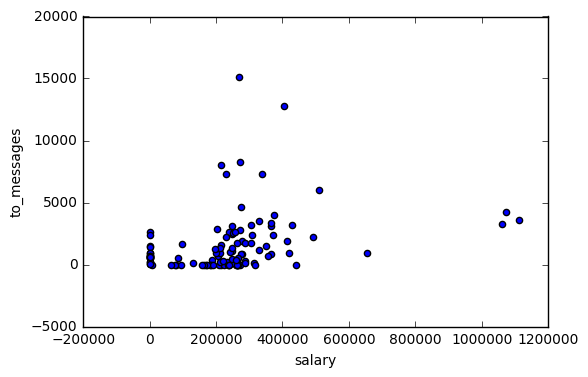

In [156]:
draw_feature(["salary", "to_messages"])

In [24]:
from sklearn.decomposition import RandomizedPCA

In [115]:
all_features = ['poi'] + finance_features + email_features

In [ ]:
pca = RandomizedPCA()

In [175]:
import pickle

In [177]:
d = pickle.load(open("final_project_dataset_modified.pkl"))

In [178]:
d

{'ALLEN PHILLIP K': {'bonus': 4175000,
  'deferral_payments': 2869717,
  'deferred_income': -3081055,
  'director_fees': 'NaN',
  'email_address': 'phillip.allen@enron.com',
  'exercised_stock_options': 1729541,
  'expenses': 13868,
  'from_messages': 2195,
  'from_poi_to_this_person': 47,
  'from_this_person_to_poi': 65,
  'loan_advances': 'NaN',
  'long_term_incentive': 304805,
  'other': 152,
  'poi': False,
  'restricted_stock': 126027,
  'restricted_stock_deferred': -126027,
  'salary': 201955,
  'shared_receipt_with_poi': 1407,
  'to_messages': 2902,
  'total_payments': 4484442,
  'total_stock_value': 1729541},
 'BADUM JAMES P': {'bonus': 'NaN',
  'deferral_payments': 178980,
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'NaN',
  'exercised_stock_options': 257817,
  'expenses': 3486,
  'from_messages': 'NaN',
  'from_poi_to_this_person': 'NaN',
  'from_this_person_to_poi': 'NaN',
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 'NaN'

In [1]:
from poi_id import *

/Users/mengyu/env/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
	Accuracy: 0.84369	Precision: 0.48973	Recall: 0.38150	F1: 0.42889	F2: 0.39914
	Total predictions: 13000	True positives:  763	False positives:  795	False negatives: 1237	True negatives: 10205



In [3]:
my_dataset

{'ALLEN PHILLIP K': {'bonus': 4175000,
  'deferral_payments': 2869717,
  'deferred_income': -3081055,
  'director_fees': 'NaN',
  'email_address': 'phillip.allen@enron.com',
  'exercised_stock_options': 1729541,
  'expenses': 13868,
  'from_messages': 2195,
  'from_poi_to_this_person': 47,
  'from_poi_to_this_person_rate': 0.016195727084769126,
  'from_this_person_to_poi': 65,
  'from_this_person_to_poi_rate': 0.029612756264236904,
  'loan_advances': 'NaN',
  'long_term_incentive': 304805,
  'other': 152,
  'poi': False,
  'restricted_stock': 126027,
  'restricted_stock_deferred': -126027,
  'salary': 201955,
  'shared_receipt_with_poi': 1407,
  'to_messages': 2902,
  'total_payments': 4484442,
  'total_stock_value': 1729541},
 'BADUM JAMES P': {'bonus': 'NaN',
  'deferral_payments': 178980,
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'NaN',
  'exercised_stock_options': 257817,
  'expenses': 3486,
  'from_messages': 'NaN',
  'from_poi_to_this_person': 'NaN'

['poi', 'from_poi_to_this_person_rate', 'from_this_person_to_poi_rate']


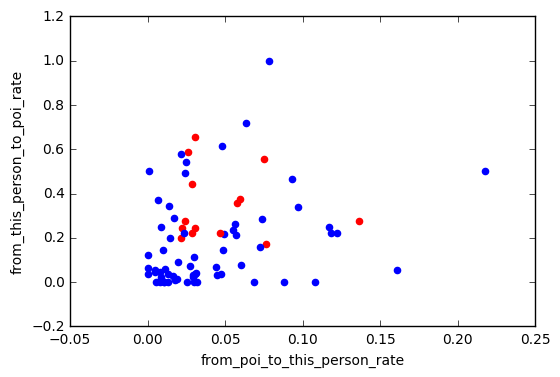

In [13]:
draw_feature(["from_poi_to_this_person_rate", "from_this_person_to_poi_rate"])